In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

In [3]:
df_clust = joblib.load('salidas/df_WithTarget.pkl')
df_clust.head()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,HomeOwnership_Own,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,0.153005,0.016528,0.099691,0.028169,0.000000,0.105263,0.860918,0.473684,0.965517,0.620690,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.393443,0.138818,0.016119,0.394366,0.555556,0.421053,0.325016,0.684211,0.000000,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.615665,0.391192,0.591818,0.873239,0.555556,0.368421,0.047852,0.315789,0.862069,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.114754,0.463579,0.108542,0.507042,1.000000,0.000000,0.965361,0.263158,0.758621,0.103448,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.918033,0.504890,0.102869,0.760563,0.111111,0.526316,0.364656,0.947368,0.655172,0.172414,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [4]:
df_clust = df_clust.drop(columns=['NoPaidPerc'])

In [5]:
# Selección de las variables deseadas
variables_seleccionadas = [
    'MaritalStatus_Widowed',
    'DebtRatio',
    'Education_Bachelor',
    'EmploymentLength',
    'HomeOwnership_Own'
]

df_kmeans = df_clust[variables_seleccionadas]


In [6]:
df_kmeans.round(4)

,MaritalStatus_Widowed,DebtRatio,Education_Bachelor,EmploymentLength,HomeOwnership_Own
0,0.0,0.0165,1.0,0.9655,0.0
1,0.0,0.1388,1.0,0.0000,0.0
2,0.0,0.3912,1.0,0.8621,0.0
3,1.0,0.4636,0.0,0.7586,1.0
4,0.0,0.5049,0.0,0.6552,1.0
...,...,...,...,...,...
9995,1.0,0.6026,1.0,0.1724,0.0
9996,0.0,0.6340,0.0,0.0000,0.0
9997,0.0,0.0197,1.0,0.1379,0.0
9998,0.0,0.1742,0.0,0.3793,0.0


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Configuración del modelo KMeans
kmeans = KMeans(
    init="k-means++",
    n_clusters=3,  # Ajusta el número de clústeres según tu objetivo
    n_init=10,
    max_iter=300,
    random_state=42
)

# Ajustar el modelo
kmeans.fit(df_kmeans)

# Obtener etiquetas de clúster para cada observación
df_clust['Cluster'] = kmeans.labels_

# Verificar la cantidad de observaciones en cada clúster
print(df_clust['Cluster'].value_counts())


Cluster
0    5060
1    2551
2    2389
Name: count, dtype: int64


In [8]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sil_score = silhouette_score(df_kmeans, kmeans.labels_)
calinski_score = calinski_harabasz_score(df_kmeans, kmeans.labels_)

print(f"Silhouette Score: {sil_score:.2f}")
print(f"Calinski-Harabasz Score: {calinski_score:.2f}")


Silhouette Score: 0.37
Calinski-Harabasz Score: 4210.68


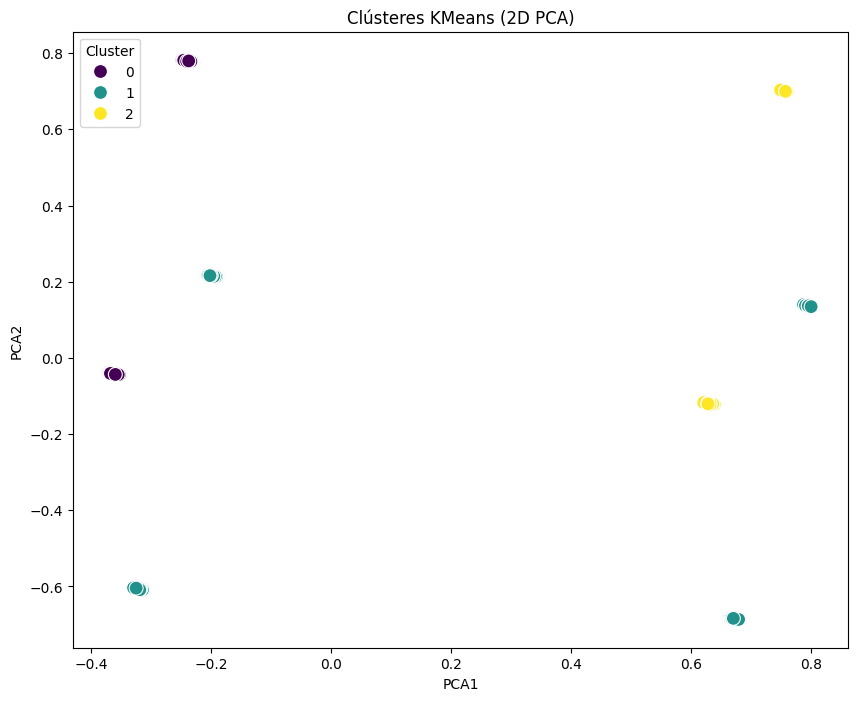

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reducción de dimensionalidad a 2D para visualizar los clústeres
pca = PCA(n_components=2)
df_kmeans_pca = pca.fit_transform(df_kmeans)

# Crear un DataFrame para visualización
df_visual = pd.DataFrame(df_kmeans_pca, columns=['PCA1', 'PCA2'])
df_visual['Cluster'] = kmeans.labels_

# Graficar
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=df_visual,
    palette='viridis',
    s=100
)
plt.title('Clústeres KMeans (2D PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()


In [10]:
cluster_summary = df_clust.groupby('Cluster')[variables_seleccionadas].mean()
print(cluster_summary)


         MaritalStatus_Widowed  DebtRatio  Education_Bachelor  \
Cluster                                                         
0                     0.249012   0.503249                 0.0   
1                     0.255194   0.496383                 1.0   
2                     0.275010   0.496022                 0.0   

         EmploymentLength  HomeOwnership_Own  
Cluster                                       
0                0.502596           0.000000  
1                0.497966           0.327323  
2                0.510934           1.000000  
